## Pandas Tutorial

https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb 의 자료를 기반으로 작성함.

Panel data analysis 혹은 python data analysis의 약자

 - “관계형”, 혹은 “테이블 형＂데이터를 만들고 조작하기 위한 파이썬 라이브러리
 - NumPy 라이브러리 기반으로 구축
 - 오픈소스(http://pandas.pydata.org)
  
  
Pandas의 장점
  
 - CSV, 엑셀, Database(SQL), Json 등 다양한 소스에서 데이터를 가져오고 또한 해당 형식으로 데이터를 내보낼 수 있는 입출력 기능.
 - 데이터의 삽입, 삭제, 병합, 결합, 슬라이싱, 인덱싱, 등 데이터를 필요한 대로 조작(manipulation)할 수 있다.
 - 누락 데이터 처리가 용이(무시하거나, 0으로 변환하거나, 평균값에 맞추거나.. 등등)
 - 통계분석이나 머신 러닝 분석이 가능하도록 연구모델을 설정할 수 있음.
 - Statsmodel, SciPy 등 다양한 데이터 분석 패키지와 쉽게 연동되어 사용할 수 있음.
 - NumPy처럼 빠른 속도로 데이터를 처리할 수 있음.  
  
다음과 같이 import해서 쓴다.

In [65]:
import pandas as pd

## 시리즈(Series)와 데이터프레임(data frame)
Series: 인덱스(index)가 있는 1차원 배열

In [2]:
s = pd.Series([1, 3, 5, 7, 9])
print(s)
print(s[2]) #indexing

0    1
1    3
2    5
3    7
4    9
dtype: int64
5


In [3]:
# dictionary를 이용해 만들기
dic = {'a':1, 'b':3, 'c':5}
s = pd.Series(dic)
print(s)
print(s['b']) #indexing

a    1
b    3
c    5
dtype: int64
3


Series의 두 속성: index, values

In [4]:
print(s.values)
print(s.index)

[1 3 5]
Index(['a', 'b', 'c'], dtype='object')


index를 부여하는 다른 방법

In [5]:
s = pd.Series([1,3,5,7,9], index=['LGT','DOO','HWE','LOT','SKW'])
#print(s)
#print(s['LOT'])
print(s[:'LOT']) # 슬라이싱에서 어디까지 나오는지 주목

LGT    1
DOO    3
HWE    5
LOT    7
dtype: int64


데이터 프레임 만들기: 데이터 프레임은 우리에게 친숙한 2차원 표와 같은 형태로 생각하면 된다. 행(row)과 열(column)으로 이루어져 있으며, 각 열에는 name이 있고 행에는 index가 있다.

In [6]:
score={'학번':[201524213,201621223,201621233],
       '이름':['오지환','박용택','정성훈'],
       'Quiz':[15,20,10],
       '중간고사':[20,20,15]}

score_df= pd.DataFrame(score)
score_df

,학번,이름,Quiz,중간고사
0,201524213,오지환,15,20
1,201621223,박용택,20,20
2,201621233,정성훈,10,15


하나의 열은 Series이며 따라서 데이터 프레임은 index를 공유하는 열 혹은 Series의 집합이라고 생각할 수 있다.

In [7]:
print(type(score_df['학번']))
score_df['학번']

<class 'pandas.core.series.Series'>


0    201524213
1    201621223
2    201621233
Name: 학번, dtype: int64

## 데이터 프레임 다루기

In [8]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Age':[26,27,25,24,31,27,25,33,42,32,51,47],
   'Score':[89,87,67,55,47,72,76,79,44,92,99,69]}
 
df = pd.DataFrame(d)
df


,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [9]:
df['Age']

0     26
1     27
2     25
3     24
4     31
5     27
6     25
7     33
8     42
9     32
10    51
11    47
Name: Age, dtype: int64

### 행과 열을 추출하기
두 개 이상의 열을 반환하고 싶으면 아래와 같이 리스트 형태로 인덱싱을 한다.

In [10]:
df[['Name', 'Age']]

,Name,Age
0,Alisa,26
1,Bobby,27
2,Cathrine,25
3,Madonna,24
4,Rocky,31
5,Sebastian,27
6,Jaqluine,25
7,Rahul,33
8,David,42
9,Andrew,32


인덱싱을 할 [] 안에 하나의 값을 쓰느냐, 아니면 리스트 형태를 쓰느냐에 따라 반환되는 값의 타입이 달라진다. 하나의 값을 쓰는 경우는 시리즈를, 리스트 형태를 쓰면 데이터프레임을 반환한다.

In [12]:
type(df['Name'])

pandas.core.series.Series

In [13]:
type(df[['Name']])

pandas.core.frame.DataFrame

[] 안에 열의 이름이 아닌 숫자를 쓰면 행을 반환하는 것이 가능하다. 단 이 경우는 슬라이싱만 가능하다.

In [14]:
df[0:3]  #df[2]는 에러 발생

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67


## loc, iloc을 이용한 인덱싱과 슬라이싱
loc과 iloc 모두 행(row)이나 열(column)을 인덱싱하기 위한 함수이다.  
iloc은 numpy의 인덱싱과 유사하게 작동한다. 저장된 순서에 따라 0부터 정수로 인덱싱, 슬라이싱이 가능하다.  
iloc[4]와 같이 값을 하나만 주는 경우에는 행을 대상으로 작동하고, iloc[:, 3]와 같이 사용하면 열에 대해 인덱싱이 가능하다.  
loc은 데이터 프레임에 정의된 index에 대해 인덱싱이 작동한다.  
슬라이싱의 경우 loc은 index 값의 크기와 무관하게 순서에 따라 슬라이싱이 작동한다.  

**iloc** 과 **loc**의 차이를 더 자세히 보고 싶으면 다음을 참조:  
http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation.

**iloc은 위치를 보고 loc은 라벨을 본다.**

In [15]:
df=df.reindex([1,4,6,2,3,5,9,8,0,7,11,10]) # 일부러 순차가 아닌 인덱스를 부여
df

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72
9,Andrew,32,92
8,David,42,44
0,Alisa,26,89
7,Rahul,33,79


In [16]:
df.loc[:6]

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76


**iloc**과 **loc**의 중요한 차이점 하나는, loc은 인덱싱하는 값을 포함하여 결과를 반환한다는 것이다.

In [17]:
df.iloc[:6]

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72


In [18]:
# sort the pandas dataframe by index ascending
 
df1=df.sort_index()
df1

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [19]:
df1.loc[:6]

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76


In [20]:
df1.iloc[:6]

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72


In [21]:
# sort the pandas dataframe by index descending
 
df2=df.sort_index(ascending=False)
df2

,Name,Age,Score
11,Teresa,47,69
10,Ajay,51,99
9,Andrew,32,92
8,David,42,44
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67


### loc와 iloc을 이용해 열(column) 추출하기

In [22]:
df2.iloc[:, 2]

11    69
10    99
9     92
8     44
7     79
6     76
5     72
4     47
3     55
2     67
1     87
0     89
Name: Score, dtype: int64

In [23]:
df2.loc[:, ['Name', 'Age']]

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [24]:
df2.iloc[:, :2]


,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [25]:
df2.loc[:, :'Age']

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


## CSV 파일에서 읽어오기
CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.
  
  
미국대학농구(NCAA)의 1985부터 2016년 까지의 자료를 예제로 사용. CSV 파일로 되어 있으며 **pd.read_csv()** 를 이용하여 읽어들이면 **dataframe** 변수 형태로 내용을 반환한다.

In [67]:
df = pd.read_csv('C://Users//user//Downloads//RegularSeasonCompactResults.csv')

In [68]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [69]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


In [70]:
df.shape

(145289, 8)

In [71]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

In [72]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


**max()** 함수를 이용하면 원하는 열이나 전체 열의 최대값을 구할 수 있다.`ㅡ

In [73]:
df.max()

Season    2016
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

특정 열의 최대값을 구하고 싶으면 아래와 같이 쓴다. 여기서는 이긴 팀의 점수: Wscore.

In [74]:
df['Wscore'].max()

186

진 팀의 점수(Lscore) 평균을 구하고 싶다면 아래와 같이 쓴다.

In [75]:
df['Lscore'].mean()

64.49700940883343

이긴 팀의 점수가 최대인 행의 위치(index)를 알고 싶다면 아래와 같이 **argmax()** 함수를 사용한다.

In [76]:
df['Wscore'].argmax()

24970

향후에는 argmax 대신 idxmax를 쓰도록 친절하게 권장하므로 이후부터는 idxmax로 고쳐서 쓴다.

In [77]:
df.loc[24970] #반환된 index 값을 이용해 값을 출력

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

In [78]:
df.loc[df['Wscore'].idxmax()] #위 과정을 하나로 합침

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

유용하게 쓰이는 함수 중 하나는 **value_counts()** 함수로, 특정 열에 사용된 값들에 대해 횟수를 계산하여 보여준다. 아래 예에서는 Season 열에서 각 시즌(연도)의 값이 나타난 수를 연도 별로 보여준다.

In [79]:
df['Season'].value_counts()

2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: Season, dtype: int64

## 데이터프레임 값 추출
데이터프레임 변수에 열의 이름을 이용하여 인덱싱을 하면 특정 열의 값만을 추출할 수 있다. 이긴 팀의 점수만을 추출하고 싶다면 아래와 같이 인덱싱을 한다.

In [80]:
Wscore = df['Wscore']
Wscore.head() #갯수가 너무 많으므로 뒤에 head()함수를 써서 앞부분만 추출

0    81
1    77
2    63
3    70
4    86
Name: Wscore, dtype: int64

In [81]:
df.loc[[df['Wscore'].idxmax()]]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
24970,1991,68,1258,186,1109,140,H,0


In [82]:
df.loc[df['Wscore'].idxmax()]

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

위 예에서 좀 더 나아가, 이긴 팀의 점수가 가장 높은 경기에서 진 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다.

In [83]:
df.loc[[df['Wscore'].idxmax()]]['Lscore']

24970    140
Name: Lscore, dtype: int64

In [84]:
df.loc[df['Wscore'].idxmax()]['Lscore']

140

아래와 같이 loc에 행과 열을 동시에 인덱싱하는 것도 가능하다.

In [85]:
df.loc[df['Wscore'].idxmax(), 'Lscore']

140

출력되는 모양을 보면 데이터프레임인지 아니면 시리즈인지 알 수 있다. 위의 예는 **Series** 임을 알 수 있다. 보다 명확하게 데이터형을 알고 싶다면 아래와 같이 **type()** 함수를 써서 확인한다.

In [86]:
type(df.loc[[df['Wscore'].idxmax()]]['Lscore'])

pandas.core.series.Series

In [87]:
type(df.loc[[df['Wscore'].idxmax()]])

pandas.core.frame.DataFrame

## 정렬(Sorting)
  
진 팀의 점수에 따라 오름차순으로 정렬하고 싶다면 아래와 같이 **sort_values()** 함수를 사용한다.

In [88]:
df.sort_values('Lscore').head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


## 조건에 따라 행 추출
이긴 팀의 점수가 150보다 큰 행만 추출하기 위한 두 단계

1. 먼저 df['Wscore'] > 150 는 각 행에 대해 Wscore가 150보다 큰 지의 여부를 True/False Series로 반환한다.
2. 이 Series를 이용하여 df를 다음과 같이 인덱싱하면 시리즈에서 True인 행들만 추출할 수 있다:  
**df[df['Wscore'] > 150]**.

In [89]:
print(type(df['Wscore'] > 150)) # True/False 시리즈로 반환되는지 확인
(df['Wscore'] > 150).head() # 시리즈의 앞부분을 확인

<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
Name: Wscore, dtype: bool

In [90]:
df[df['Wscore'] > 150].head() # Boolean Series를 이용해 조건이 True인 행들만 추출

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0


아래와 같이 두가지 이상의 조건을 부여할 수 있다.

In [91]:
df[(df['Wscore'] > 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


## 그룹화(Grouping)
groupby() 는 특정 속성 별로 그룹화 함수를 적용할 수 있도록 한다.  
예를 들어 df['Wscore'].mean()은 모든 행에 있는 Wscore의 평균을 계산하지만, Wteam 별로 Wscore의 평균을 구하고 싶다면, 다시 말해서 Wteam 값이 같은 행들에 대해 Wscore의 평균을 구하고 싶다면 **groupby('Wteam')**을 아래와 같이 사용한다.

In [92]:
df.groupby('Wteam')['Wscore'].mean().head()

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
Name: Wscore, dtype: float64

아래는 이긴 팀 별로, home, away, neutral에서 각각 몇 번 이겼는지를 구하는 예이다.

In [94]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: Wloc, dtype: int64

**values** 속성은 데이터프레임의 값들을 Numpy 형태로 반환한다.

In [95]:
print(type(df.values))
print(df.values.shape)
df.values

<class 'numpy.ndarray'>
(145289, 8)


array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2016, 132, 1246, ..., 77, 'N', 1],
       [2016, 132, 1277, ..., 62, 'N', 0],
       [2016, 132, 1386, ..., 74, 'N', 0]], dtype=object)

따라서 **values** 속성은 Numpy ndarray와 동일한 방법으로 사용할 수 있다.

In [97]:
df.values[0, 0]

1985

## 데이터프레임 순환
**iterrows()** 함수를 사용하면 데이터프레임의 행 단위로 순환이 가능하다. 각 행은 시리즈 형태로 반환된다.

In [98]:
for index, row in df.iterrows():
    print('#Data type of row:', type(row))
    print(row)
    if index == 1:
        break

#Data type of row: <class 'pandas.core.series.Series'>
Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object
#Data type of row: <class 'pandas.core.series.Series'>
Season    1985
Daynum      25
Wteam     1106
Wscore      77
Lteam     1354
Lscore      70
Wloc         H
Numot        0
Name: 1, dtype: object


## 데이터 클리닝
데이터 처리에서 가장 지루하고 어려운 작업 중 하나는 데이터 클리닝이다.  
대표적인 클리닝은 결측값(missing value)의 처리인데, pandas는 결측값 여부를 반환하는 **isnull** 함수가 있다. 아래와 같이 **sum()** 함수와 결합하면 각 열의 결측값 수를 알 수 있다:

In [99]:
df.isnull().sum()

Season    0
Daynum    0
Wteam     0
Wscore    0
Lteam     0
Lscore    0
Wloc      0
Numot     0
dtype: int64

위 예에서는 결측값이 없으므로 일부러 결측값을 넣은 예제를 본다. 아래 예에서 NaN은 Not a Number의 줄임말로 숫자여야 하는 값이 비어있거나 숫자가 아닌 경우를 나타낸다.

In [111]:
df1 = pd.read_csv('C://Users//user//Downloads//sample.csv') 

df1 

,name,sn,mid,final,quiz
0,Prark,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,NaN,NaN,10
3,Kang,1004,90.0,49.0,10


In [112]:
df1.isnull().sum()

name     0
sn       0
mid      1
final    1
quiz     0
dtype: int64

결측치를 처리하는 일반적인 방법으로 다음과 같은 두 함수가 있다.

 * **dropna()** - 결측치가 있는 모든 행을 없앤다.
 * **fillna()** - 결측치를 정해진 값으로 바꾼다.  
  
아래 예에서는 결측치를 0으로 바꾼다.

In [113]:
df1.fillna(0)

,name,sn,mid,final,quiz
0,Prark,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [114]:
df1.dropna()

,name,sn,mid,final,quiz
0,Prark,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
3,Kang,1004,90.0,49.0,10


## 데이터 시각화
matplotlib을 이용해 아래와 같이 데이터프레임으로부터 바로 그래프를 그리는 것이 가능

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

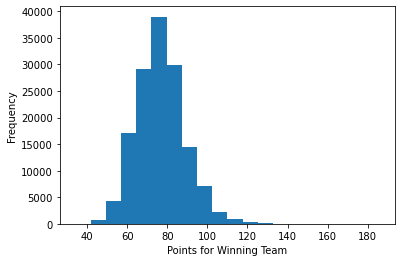

In [116]:
ax = df['Wscore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')
plt.show()

## CSV 파일로 데이터프레임 저장
to_csv() 함수를 사용하면 데이터프레임을 csv로 쉽게 저장할 수 있다. 아래 예는 위에서 사용한 결측치 있는 데이터프레임에서 결측치를 0으로 바꾸고 저장하는 예이다.

In [117]:
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv')
df2


,Unnamed: 0,name,sn,mid,final,quiz
0,0,Prark,1001,70.0,60.0,10
1,1,Kim,1002,80.0,75.0,10
2,2,Lee,1003,0.0,0.0,10
3,3,Kang,1004,90.0,49.0,10


위 예를 보면 첫 열에 Unnamed가 있는 것을 볼 수 있는데, 저장할 때 index가 함께 저장되고 읽어들일때는 새로운 인덱스를 자동으로 할당했기 때문이다. 이것을 해결하는 방법으로 첫째 저장할 때 인덱스를 제외하고 저장하거나, 둘째 읽어들일때 첫 열을 인덱스로 읽어들이는 방법이 있다.

In [118]:
#첫째 방법
df1.fillna(0).to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,name,sn,mid,final,quiz
0,Prark,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [119]:
#둘째 방법
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,name,sn,mid,final,quiz
0,Prark,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


## 기타 유용한 함수들
직접 검색해 보세요.

 * **drop()** - This function removes the column or row that you pass in (You also have the specify the axis).
 * **agg()** - The aggregate function lets you compute summary statistics about each group
 * **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
 * **get_dummies()** - Helpful for turning categorical data into one hot vectors.
 * **drop_duplicates()** - Lets you remove identical rows  
   
   
## 기타 참고 사이트

 * http://pandas.pydata.org/pandas-docs/stable/10min.html
 * https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
 * http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
 * https://www.dataquest.io/blog/pandas-python-tutorial/
 * https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
 * https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y

----

# 실습

### Pandas 시작- 파일을 DataFrame 로딩, 기본 API

In [2]:
import pandas as pd

In [120]:
titanic_df = pd.read_csv('C://Users//user//Downloads//titanic_train.csv') #csv 파일을 데이터 프레임으로 불러오기
print('titanic 변수 type:',type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.head(3) # 상위 3개만 보여주기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('DataFrame 크기: ', titanic_df.shape) # 데이터프레임의 크기

DataFrame 크기:  (891, 12)


In [8]:
titanic_df.info() # 칼럼의 타입, Null데이터 개수, 데이터 분포도 등의 메타 데이터 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df.describe() # 대략적인 분포도 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
value_counts = titanic_df['Pclass'].value_counts() # 해당 칼럼값의 유형과 건수를 확인
print(value_counts)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [11]:
titanic_pclass = titanic_df['Pclass'] 
print(type(titanic_pclass)) # Series 형태로 반환

<class 'pandas.core.series.Series'>


In [12]:
titanic_pclass.head() # 상위 다섯개 보여줌

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [13]:
value_counts = titanic_df['Pclass'].value_counts() # 해당 칼럼값의 유형과 건수를 확인
print(type(value_counts)) # Series 형태로 반환
print(value_counts) # 출력

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

* 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기

In [14]:
import numpy as np

col_name1=['col1'] # 칼럼 명 지정 
list1 = [1, 2, 3] # 리스트 생성 
array1 = np.array(list1) # 배열 생성

print('array1 shape:', array1.shape )
df_list1 = pd.DataFrame(list1, columns=col_name1) # 리스트를 데이터 프레임으로 
print('1차원 리스트로 만든 DataFrame:\n', df_list1) 
df_array1 = pd.DataFrame(array1, columns=col_name1) # 배열을 데이터 프레임으로 
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [15]:
# 3개의 컬럼명이 필요함. 
col_name2=['col1', 'col2', 'col3'] 

# 2행x3열 형태의 리스트와 ndarray 생성 한 뒤 이를 DataFrame으로 변환. 
list2 = [[1, 2, 3],
         [11, 12, 13]] # 리스트 생성 
array2 = np.array(list2) #배열 생성
print('array2 shape:', array2.shape )
df_list2 = pd.DataFrame(list2, columns=col_name2) # 리스트를 데이터 프레임으로 
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2 = pd.DataFrame(array2, columns=col_name2) # 배열을 데이터 프레임으로 
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [16]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]} # 딕셔너리 생성
df_dict = pd.DataFrame(dict) # 딕셔너리를 데이터 프레임으로
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


* DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기

In [17]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values # 데이터 프레임의 값들을 배열에 저장
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape) 
print(array3)



df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


In [18]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist() # 데이터 프레임을 리스트로 변환
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list') #데이터 프레임을 딕셔너리로 변환
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


### DataFrame의 컬럼 데이터 셋 Access

In [19]:
titanic_df['Age_0']=0 # 컬럼 생성
titanic_df.head(3) # 상위 3개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [20]:
titanic_df['Age_by_10'] = titanic_df['Age']*10 # age에 10 곱한 값으로 생성 
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1 # 연산된 값으로 컬럼 생성
titanic_df.head(3) # 상위 3개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [21]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100 # 값 수정
titanic_df.head(3) # 상위 3개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


### DataFrame 데이터 삭제

In [22]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1 ) # 컬럼 값 삭제
titanic_drop_df.head(3) # 상위 3개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1


In [23]:
titanic_df.head(3) # 상위 3개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [24]:
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True) # 컬럼 값 삭제, 데이터 프레임의 데이터 삭제
print(' inplace=True 로 drop 후 반환된 값:',drop_result) 
titanic_df.head(3) # 상위 3개 출력

 inplace=True 로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [121]:
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


### Index 객체

In [122]:
# 원본 파일 재 로딩 
titanic_df = pd.read_csv('titanic_train.csv')
# Index 객체 추출
indexes = titanic_df.index
print(indexes)
# Index 객체를 실제 값 arrray로 변환 
print('Index 객체 array값:\n',indexes.values)


FileNotFoundError: [Errno 2] File titanic_train.csv does not exist: 'titanic_train.csv'

In [123]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

NameError: name 'indexes' is not defined

In [124]:
indexes[0] = 5

NameError: name 'indexes' is not defined

In [125]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

Fair Series max 값: 512.3292
Fair Series sum 값: 28607.491
sum() Fair Series: 28607.49099999997
Fair Series + 3:
 3    56.1000
4    11.0500
5    11.4583
Name: Fare, dtype: float64


In [126]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
1,4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
2,5,6,0,3,"Moran, Mr. ...",male,NaN,0,0,330877,8.4583,NaN,Q


In [127]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### before reset_index ###
3    489
1    215
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   index  Pclass
0      3     489
1      1     215
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


### 데이터 셀렉션 및 필터링

* DataFrame의 [ ] 연산자

In [128]:
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

단일 컬럼 데이터 추출:
 3    1
4    3
5    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출:
    Survived  Pclass
3         1       1
4         0       3
5         0       3


KeyError: 0

In [129]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.05,NaN,S


In [130]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. ...",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Ma...",male,2.0,3,1,349909,21.0750,NaN,S


* DataFrame ix[] 연산자

In [131]:
print('컬럼 위치 기반 인덱싱 데이터 추출:',titanic_df.ix[0,2])
print('컬럼명 기반 인덱싱 데이터 추출:',titanic_df.ix[0,'Pclass'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [132]:
data = {'Name': ['Chulmin', 'Eunkyung','Jinwoong','Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df


,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [133]:
print("\n ix[0,0]", data_df.ix[0,0])
print("\n ix['one', 0]", data_df.ix['one',0])
print("\n ix[3, 'Name']",data_df.ix[3, 'Name'],"\n")

print("\n ix[0:2, [0,1]]\n", data_df.ix[0:2, [0,1]])
print("\n ix[0:2, [0:3]]\n", data_df.ix[0:2, 0:3])
print("\n ix[0:3, ['Name', 'Year']]\n", data_df.ix[0:3, ['Name', 'Year']], "\n")
print("\n ix[:] \n", data_df.ix[:])
print("\n ix[:, :] \n", data_df.ix[:, :])

print("\n ix[data_df.Year >= 2014] \n", data_df.ix[data_df.Year >= 2014])


AttributeError: 'DataFrame' object has no attribute 'ix'

In [134]:
print(data_df.ix[0:1 , 'Name'])

AttributeError: 'DataFrame' object has no attribute 'ix'

* 명칭 기반 인덱싱과 위치 기반 인덱싱의 구분

In [135]:
# data_df 를 reset_index() 로 새로운 숫자형 인덱스를 생성
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

# index 값에 1을 더해서 1부터 시작하는 새로운 index값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chulmin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [136]:
# 아래 코드는 오류를 발생합니다. 
data_df_reset.ix[0,1]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [137]:
data_df_reset.ix[1,1]

AttributeError: 'DataFrame' object has no attribute 'ix'

* DataFrame iloc[ ] 연산자

In [138]:
data_df.iloc[0, 0]

'Chulmin'

In [139]:
# 아래 코드는 오류를 발생합니다. 
data_df.iloc[0, 'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [140]:
# 아래 코드는 오류를 발생합니다. 
data_df.iloc['one', 0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [141]:
data_df_reset.iloc[0, 1]

'Chulmin'

* DataFrame loc[ ] 연산자

In [142]:
data_df.loc['one', 'Name']

'Chulmin'

In [143]:
data_df_reset.loc[1, 'Name']

'Chulmin'

In [144]:
# 아래 코드는 오류를 발생합니다. 
data_df_reset.loc[0, 'Name']

KeyError: 0

In [145]:
print('명칭기반 ix slicing\n', data_df.ix['one':'two', 'Name'],'\n')
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [146]:
print(data_df_reset.loc[1:2 , 'Name'])

1     Chulmin
2    Eunkyung
Name: Name, dtype: object


In [147]:
print(data_df.ix[1:2 , 'Name'])


AttributeError: 'DataFrame' object has no attribute 'ix'

* 불린 인덱싱

In [148]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean

FileNotFoundError: [Errno 2] File titanic_train.csv does not exist: 'titanic_train.csv'

In [149]:
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [150]:
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [151]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


In [152]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[ cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


### 정렬, Aggregation함수, GroupBy 적용

* DataFrame, Series의 정렬 - sort_values()


In [153]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [154]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


* Aggregation 함수 적용

In [155]:
titanic_df.count()

PassengerId    888
Survived       888
Pclass         888
Name           888
Sex            888
Age            711
SibSp          888
Parch          888
Ticket         888
Fare           888
Cabin          203
Embarked       886
dtype: int64

In [156]:
titanic_df[['Age', 'Fare']].mean()

Age     29.703474
Fare    32.215643
dtype: float64

* groupby() 이용하기

In [157]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [158]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,215,215,215,215,185,215,215,215,215,175,213
2,184,184,184,184,173,184,184,184,184,16,184
3,489,489,489,489,353,489,489,489,489,12,489


In [159]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,215,215
2,184,184
3,489,489


In [160]:
titanic_df.groupby('Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [161]:
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,89,84.214554
2,70.0,74,20.662183
3,74.0,301,13.700450


### 결손 데이터 처리하기
* isna()로 결손 데이터 여부 확인

In [162]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False


In [163]:
titanic_df.isna( ).sum( )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

* fillna( ) 로 Missing 데이터 대체하기

In [164]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,C000,S
5,6,0,3,"Moran, Mr. ...",male,NaN,0,0,330877,8.4583,C000,Q


In [165]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공

In [166]:
def get_square(a):
    return a**2

print('3의 제곱은:',get_square(3))

3의 제곱은: 9


In [167]:
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

3의 제곱은: 9


In [168]:
a=[1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [169]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
3,"Futrelle, M...",44
4,"Allen, Mr. ...",24
5,"Moran, Mr. ...",16


In [170]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <=15 else 'Adult' )
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.703474,Adult
6,54.000000,Adult
7,2.000000,Child
8,27.000000,Adult
9,14.000000,Child
10,4.000000,Child


In [171]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x <= 60 else 
                                                                                  'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      783
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [172]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성. 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()
    

,Age,Age_cat
3,35.000000,Young Adult
4,35.000000,Young Adult
5,29.703474,Young Adult
6,54.000000,Adult
7,2.000000,Baby
